In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc, precision_score, recall_score, f1_score
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import itertools
import math
from matplotlib import pyplot as plt
import seaborn as sns

Import the file

In [2]:
df = pd.read_excel('main Model - German data.xlsx')

### Exploratory data analysis

In [3]:
df.head()

,checking,duration,credit_history,purpose,credit_amount,savings,employment_since,installment_rate,marital_status,debtors,...,property,age,other_instalment,housing,existing_credits,job,maintenance_people,telephone,foreign,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   checking            1000 non-null   object
 1   duration            1000 non-null   int64 
 2   credit_history      1000 non-null   object
 3   purpose             1000 non-null   object
 4   credit_amount       1000 non-null   int64 
 5   savings             1000 non-null   object
 6   employment_since    1000 non-null   object
 7   installment_rate    1000 non-null   int64 
 8   marital_status      1000 non-null   object
 9   debtors             1000 non-null   object
 10  residence_since     1000 non-null   int64 
 11  property            1000 non-null   object
 12  age                 1000 non-null   int64 
 13  other_instalment    1000 non-null   object
 14  housing             1000 non-null   object
 15  existing_credits    1000 non-null   int64 
 16  job                 1000 

In [5]:
df.describe()


,duration,credit_amount,installment_rate,residence_since,age,existing_credits,maintenance_people,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


## Logistic regression model - numerical variables only

Select only numerical variables

In [7]:
numerical_df = df.select_dtypes(include=[np.number])
numerical_df

,duration,credit_amount,installment_rate,residence_since,age,existing_credits,maintenance_people,target
0,6,1169,4,4,67,2,1,0
1,48,5951,2,2,22,1,1,1
2,12,2096,2,3,49,1,2,0
3,42,7882,2,4,45,1,2,0
4,24,4870,3,4,53,2,2,1
...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0
996,30,3857,4,4,40,1,1,0
997,12,804,4,4,38,1,1,0
998,45,1845,4,4,23,1,1,1


**Regression model**

In [9]:
independent_num = ['duration', 'installment_rate', 'age' ] 
dependent_num = 'target' 


X = df[independent_num]
X = sm.add_constant(X) 
y = df[dependent_num]

model = sm.Logit(y, X)
result_num = model.fit()
print(result_num.summary())

Optimization terminated successfully.
         Current function value: 0.582253
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                 0.04684
Time:                        16:11:40   Log-Likelihood:                -582.25
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 2.304e-12
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.4006      0.325     -4.313      0.000      -2.037      -0.764
duration   

**Excluding the high p-value variables and sorting them based on their significance**

In [10]:
p_values = result_num.pvalues
z_scores = result_num.tvalues 
coefficients = result_num.params

summary_table = pd.DataFrame({
    'Variable': z_scores.index,
    'P-Value': p_values,
    'Z-Score': z_scores.abs(),
    'Coefficient': coefficients
})

# variables with p-values higher than 0.05 (significant variables)
significant_summary_table = summary_table[summary_table['P-Value'] <= 0.05]

# Sort the values (abs value)
significant_summary_table['Abs. Z-Score'] = significant_summary_table['Z-Score'].abs()
sorted_summary_table = significant_summary_table.sort_values(by='Abs. Z-Score', ascending=False)

# sorted values - table
sorted_summary_table[['Abs. Z-Score', 'Coefficient']]

,Abs. Z-Score,Coefficient
duration,6.434569,0.037045
const,4.312533,-1.400552
age,2.903006,-0.019457
installment_rate,2.148128,0.140853


### Statistical tests

In [11]:
print(result_num.aic)
print(f'Chi-square of Omnibus Test: {result_num.llr:.4f}')
print(f'p-value of Omnibus Test: {result_num.llr_pvalue:.4f}')

1172.5068571169124
Chi-square of Omnibus Test: 57.2217
p-value of Omnibus Test: 0.0000


In [13]:
import math
print(f'model-log: {result_num.llf:.4f}')
print(f'null-log: {result_num.llnull:.4f}')
print(f'McFadden_pseudo_R_squared:', 1-(result_num.llf/result_num.llnull))
print('Cox_Snells_pseudo_R_squared:', 1 - math.exp((result_num.llnull - result_num.llf)*(2/result_num.nobs)))

model-log: -582.2534
null-log: -610.8643
McFadden_pseudo_R_squared: 0.04683670894115466
Cox_Snells_pseudo_R_squared: 0.05561536834840419


**Classification Table and Confusion Matrix**

In [14]:
# Make predictions using full file
y_pred = result_num.predict(X)

#approximate each probability to zero or one
prediction = list(map(round, y_pred)) 

# comparing original and predicted values of y 
print('Actual values', list(y.values)) 
print('Predictions :', prediction) 

Actual values [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0

Hosmer-Lemeshow test

In [15]:
from scipy.stats import chi2
hl_df = pd.DataFrame({
"P_i": y_pred,
"Outcome": df.target   
})

hl_df["decile"] = pd.qcut(hl_df["P_i"],10)

obsevents_1 = hl_df["Outcome"].groupby(hl_df.decile).sum()
obsevents_0 = hl_df["Outcome"].groupby(hl_df.decile).count() - obsevents_1

expevents_1 = hl_df["P_i"].groupby(hl_df.decile).sum()
expevents_0 = hl_df["P_i"].groupby(hl_df.decile).count() - expevents_1

hl = (((obsevents_0 - expevents_0)**2)/(expevents_0)).sum() + (((obsevents_1 - expevents_1)**2)/(expevents_1)).sum()

hl_pvalue = 1 - chi2.cdf(hl , 10 - 2)
print('Hosmer-Lemeshow test:', hl_pvalue)

Hosmer-Lemeshow test: 0.3373307531951767


C:\Users\jedre\AppData\Local\Temp\ipykernel_8444\4146093730.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obsevents_1 = hl_df["Outcome"].groupby(hl_df.decile).sum()
C:\Users\jedre\AppData\Local\Temp\ipykernel_8444\4146093730.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obsevents_0 = hl_df["Outcome"].groupby(hl_df.decile).count() - obsevents_1
C:\Users\jedre\AppData\Local\Temp\ipykernel_8444\4146093730.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt

Accuracy: 0.7070


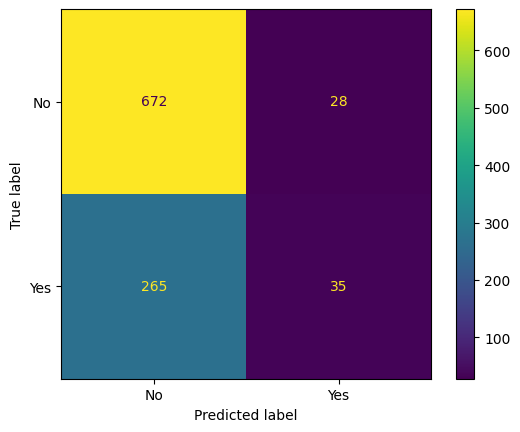

In [16]:
# Evaluate the model for full-file
accuracy = accuracy_score(y, prediction)
print(f'Accuracy: {accuracy:.4f}')

labels = ['No', 'Yes']
conf_matrix = confusion_matrix(y.values, prediction)
ConfusionMatrixDisplay(conf_matrix, display_labels=labels).plot()

**Classification report**

In [17]:
class_report = classification_report(y.values, prediction)
print('Classification Report:')
print(class_report)

tn, fp, fn, tp = confusion_matrix(y.values, prediction).ravel()
# Calculate precision, recall, and F1 score directly
precision = precision_score(y.values, prediction)
recall = recall_score(y.values, prediction)
f1 = f1_score(y.values, prediction)

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
err = (fp + fn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)  
specificity = tn / (tn + fp)
precision = tp / (tp + fp)

# Print calculated metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {err:.4f}')
print(f'Recall (Sensitivity) True Positive Rate (TPR): {sensitivity:.4f}')
print(f'(Specificity) True Negative Rate (TNR): {specificity:.4f}')
print(f'Precision: {precision:.4f}')
print(f'f1 score: {f1:.4f}')

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       700
           1       0.56      0.12      0.19       300

    accuracy                           0.71      1000
   macro avg       0.64      0.54      0.51      1000
weighted avg       0.67      0.71      0.63      1000

Accuracy: 0.7070
Error Rate: 0.2930
Recall (Sensitivity) True Positive Rate (TPR): 0.1167
(Specificity) True Negative Rate (TNR): 0.9600
Precision: 0.5556
f1 score: 0.1928


**ROC curve**

In [18]:
correlation_matrix = df[['duration', 'installment_rate', 'age', 'target' ]].corr()
correlation_matrix

,duration,installment_rate,age,target
duration,1.000000,0.074749,-0.036136,0.214927
installment_rate,0.074749,1.000000,0.058266,0.072404
age,-0.036136,0.058266,1.000000,-0.091127
target,0.214927,0.072404,-0.091127,1.000000


<Axes: >

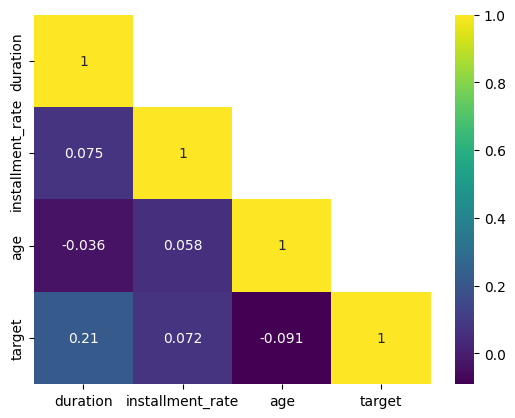

In [19]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='viridis', )

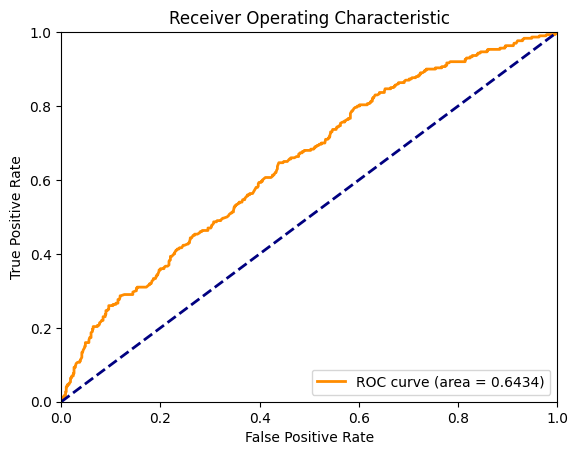

In [21]:
fpr, tpr, thresholds = roc_curve(list(df.target), y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Balanced dataset

In [23]:
df_2 = pd.read_excel('Balanced dataset - German data.xlsx')

In [24]:
numerical_df_2 = df_2.select_dtypes(include=[np.number])
numerical_df_2

,duration,credit_amount,installment_rate,residence_since,age,existing_credits,maintenance_people,target
0,48,5951,2,2,22,1,1,1
1,24,4870,3,4,53,2,2,1
2,30,5234,4,2,28,2,1,1
3,12,1295,3,1,25,1,1,1
4,48,4308,3,4,24,1,1,1
...,...,...,...,...,...,...,...,...
634,12,1736,3,4,31,1,1,0
635,30,3857,4,4,40,1,1,0
636,12,804,4,4,38,1,1,0
637,45,1845,4,4,23,1,1,1


In [32]:
independent_num = ['duration', 'residence_since','installment_rate', 'age', 'existing_credits', 'maintenance_people' ] 
dependent_num = 'target' 


X = df[independent_num]
X = sm.add_constant(X) 
y = df[dependent_num]

model02 = sm.Logit(y, X)
result_num02 = model02.fit()
print(result_num02.summary())

Optimization terminated successfully.
         Current function value: 0.581360
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      993
Method:                           MLE   Df Model:                            6
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                 0.04830
Time:                        16:40:07   Log-Likelihood:                -581.36
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 7.153e-11
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4403      0.423     -3.405      0.001      -2.269      -0.611
durat

In [33]:
p_values = result_num.pvalues
z_scores = result_num.tvalues 
coefficients = result_num.params

summary_table = pd.DataFrame({
    'Variable': z_scores.index,
    'P-Value': p_values,
    'Z-Score': z_scores.abs(),
    'Coefficient': coefficients
})

# variables with p-values higher than 0.05 (significant variables)
significant_summary_table = summary_table[summary_table['P-Value'] <= 0.05]

# Sort the values (abs value)
significant_summary_table['Abs. Z-Score'] = significant_summary_table['Z-Score'].abs()
sorted_summary_table = significant_summary_table.sort_values(by='Abs. Z-Score', ascending=False)

# sorted values - table
sorted_summary_table[['Abs. Z-Score', 'Coefficient']]

C:\Users\jedre\AppData\Local\Temp\ipykernel_8444\642117038.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_summary_table['Abs. Z-Score'] = significant_summary_table['Z-Score'].abs()


,Abs. Z-Score,Coefficient
duration,6.401098,0.036921
const,3.405468,-1.440283
age,2.850082,-0.020005
installment_rate,2.168108,0.142495


In [34]:
# Make predictions using full file
y_pred02 = result_num02.predict(X)

#approximate each probability to zero or one
prediction02 = list(map(round, y_pred02)) 

# comparing original and predicted values of y 
print('Actual values', list(y.values)) 
print('Predictions :', prediction02) 

Actual values [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0

In [35]:
# Evaluate the model for full-file
accuracy02 = accuracy_score(y, prediction02)
print(f'Accuracy: {accuracy02:.4f}')

Accuracy: 0.7080


In [38]:
class_report = classification_report(y.values, prediction02)
print('Classification Report:')
print(class_report)

tn, fp, fn, tp = confusion_matrix(y.values, prediction02).ravel()
# Calculate precision, recall, and F1 score directly
precision = precision_score(y.values, prediction02)
recall = recall_score(y.values, prediction02)
f1 = f1_score(y.values, prediction02)

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
err = (fp + fn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)  
specificity = tn / (tn + fp)
precision = tp / (tp + fp)

# Print calculated metrics
print(f'Accuracy: {accuracy02:.4f}')
print(f'Error Rate: {err:.4f}')
print(f'Recall (Sensitivity) True Positive Rate (TPR): {sensitivity:.4f}')
print(f'(Specificity) True Negative Rate (TNR): {specificity:.4f}')
print(f'Precision: {precision:.4f}')
print(f'f1 score: {f1:.4f}')

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.82       700
           1       0.57      0.11      0.18       300

    accuracy                           0.71      1000
   macro avg       0.64      0.54      0.50      1000
weighted avg       0.67      0.71      0.63      1000

Accuracy: 0.7080
Error Rate: 0.2920
Recall (Sensitivity) True Positive Rate (TPR): 0.1067
(Specificity) True Negative Rate (TNR): 0.9657
Precision: 0.5714
f1 score: 0.1798
